## This script was developed for:
#### Zhu, F. and B.E.J. Rose. (2022). Multiple Equilibria in a Coupled Climate-Carbon Model. Journal of Climate. DOI: 10.1175/JCLI-D-21-0984.1

Author of the script: *Fangze Zhu*

University at Albany, State University of New York (SUNY)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import colors

In [43]:
exp_warm = [#'warmT293_50',
            #'warmT293_pre415',
            #'warmT293_cen415',
            #'warmT293_415',
            #'warm_150',
            #'warm_post150',
            'warm_test16_1050',
            #'warm_test16_1100',
            #'warm_test16_1150',
            #'warm_test16_1200',
            'warm_test16_1250',
            ]
exp_cold = ['cold_800',
            
            #'cold_850',
            #'cold_900',
            'cold_950',
            #'cold_1000',
            ]
exp_waterbelt = [#'waterbelt_350',
                 #'waterbelt_400',
                 #'waterbelt_410',
                 #'waterbelt_420',
                 #'waterbelt_430',
                 #'waterbelt_440',
                 #'waterbelt_450',
                 'waterbelt_500',
                 'waterbelt_550',
                 ]
item_list = ['feedback_T_LW',
             'feedback_P_LW',
             'feedback_L_LW',
             'feedback_Q_LW',
             'feedback_Q_SW',
             'feedback_ALB_SW',
             'feedback_CO2_LW',
             'feedback_cld_LW',
             'feedback_cld_SW',
             ]
title = np.array([['P_LW',     'L_LW',     'T_LW'],
                  ['Q_LW',     'Q_SW',     'Q'],
                  ['ALB_LW',   'ALB_SW',   'ALB'],
                  ['CO2_LW',   'CO2_SW',   'CO2'],
                  ['cld_LW',   'cld_SW',   'cld'],
                  ['LW',       'SW',       'NET']])
var = {}
feedback = {}

## Warm

In [44]:
for exp in exp_warm:
    for item in item_list:
        with open('/nfs/roselab_rit/mitgcm_output/kernel_data/feedback/'+item+'_'+exp+'.data', 'rb') as f:
            var[exp+item] = np.fromfile(f)
    var[exp+'feedback_T_SW'] = 0.
    var[exp+'feedback_T'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_T_SW']
    var[exp+'feedback_Q'] = var[exp+'feedback_Q_LW'] + var[exp+'feedback_Q_SW']
    var[exp+'feedback_L+Q'] = var[exp+'feedback_L_LW'] + var[exp+'feedback_Q_LW']
    var[exp+'feedback_ALB_LW'] = 0.
    var[exp+'feedback_ALB'] = var[exp+'feedback_ALB_LW'] + var[exp+'feedback_ALB_SW']
    var[exp+'feedback_CO2_SW'] = 0.
    var[exp+'feedback_CO2'] = var[exp+'feedback_CO2_LW'] + var[exp+'feedback_CO2_SW']
    var[exp+'feedback_cld'] = var[exp+'feedback_cld_LW'] + var[exp+'feedback_cld_SW']
    var[exp+'feedback_LW'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_Q_LW'] + \
                             var[exp+'feedback_CO2_LW'] + var[exp+'feedback_cld_LW']
    var[exp+'feedback_SW'] = var[exp+'feedback_Q_SW'] + var[exp+'feedback_ALB_SW'] + \
                             var[exp+'feedback_cld_SW']
    var[exp+'feedback_NET'] = var[exp+'feedback_LW'] + var[exp+'feedback_SW']
    
    feedback[exp] = np.zeros((6,3,len(var[exp+'feedback_NET'])))
    for row in range(6):
        for col in range(3):
            feedback[exp][row,col] = var[exp+'feedback_' + title[row,col]]

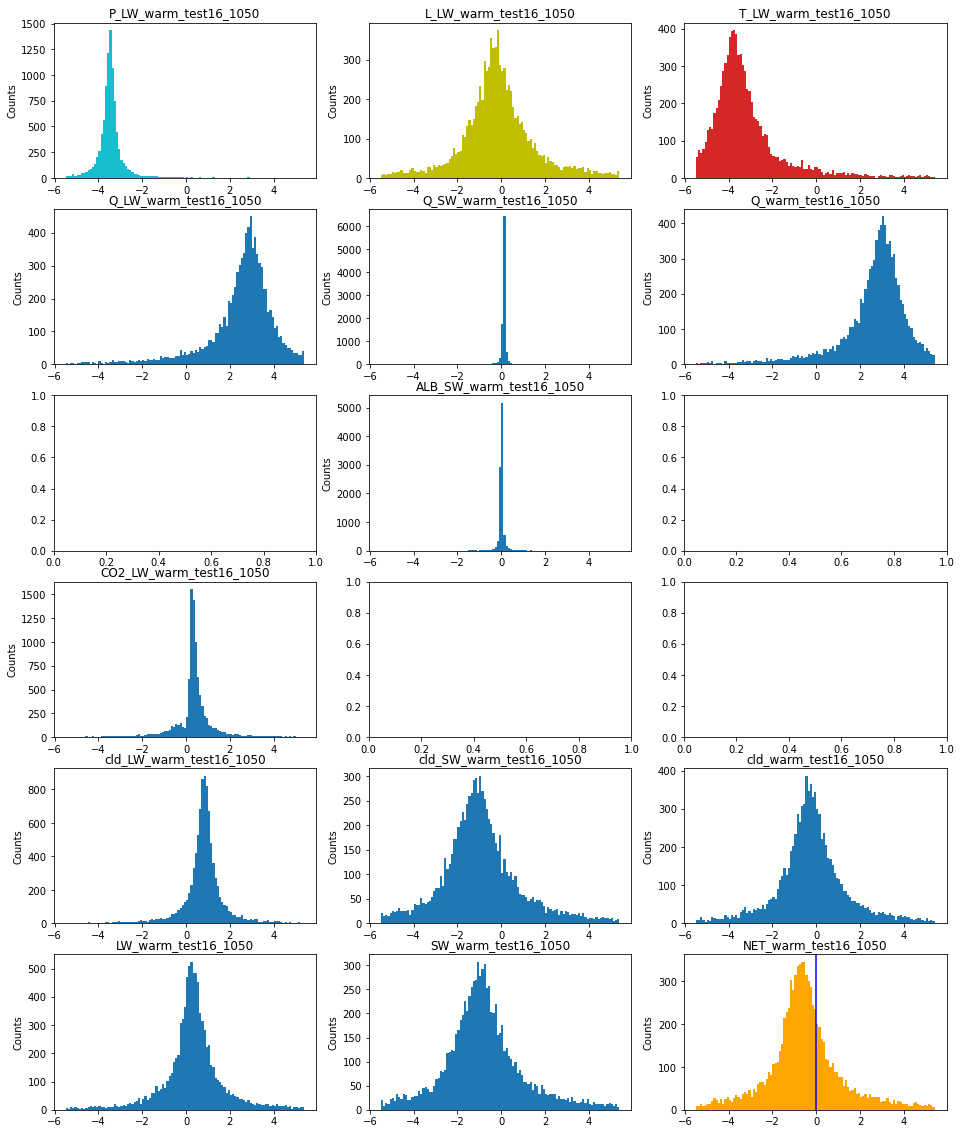

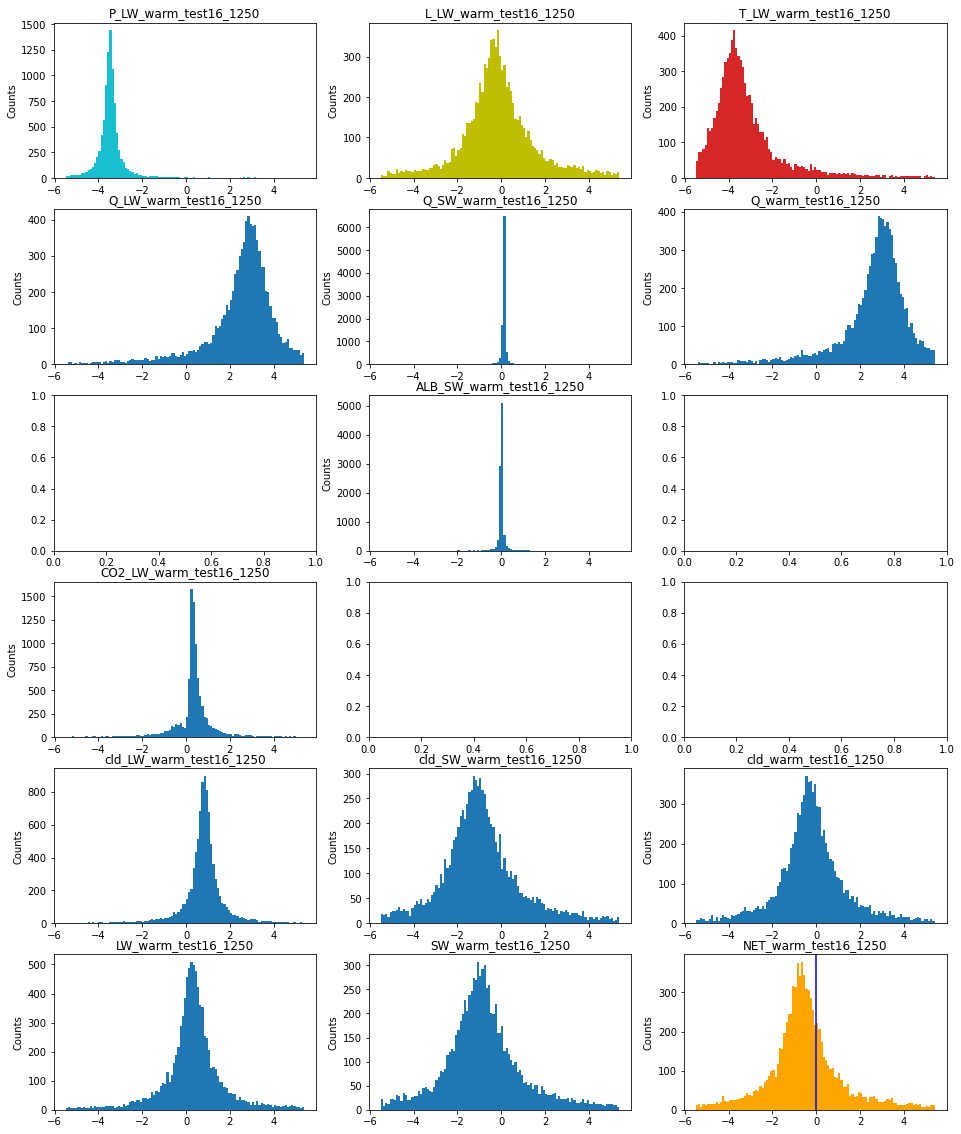

In [45]:
bins=np.arange(-5.5,5.5,0.1)
for exp in exp_warm:
    fig, axs = plt.subplots(6, 3, figsize=(16,20))
    for row in range(6):
        for col in range(3):
            if (row == 2 and col == 0) or (row == 2 and col == 2)\
            or (row == 3 and col == 1) or (row == 3 and col == 2):
                pass
            else:
                axs[row,col].hist(feedback[exp][row,col], histtype='stepfilled', bins=bins)
                axs[row,col].set_title(title[row,col]+'_'+exp)
                axs[row,col].set_ylabel('Counts')
    axs[0,0].hist(feedback[exp][0,0], histtype='stepfilled', bins=bins, color='tab:cyan')
    axs[0,1].hist(feedback[exp][0,1], histtype='stepfilled', bins=bins, color='y')
    axs[0,2].hist(feedback[exp][0,2], histtype='stepfilled', bins=bins, color='tab:red')
    axs[5,2].hist(feedback[exp][5,2], histtype='stepfilled', bins=bins, color='orange')
    axs[5,2].axvline(x=0., c='b')
    #fig.savefig('histogram_'+exp+'.pdf')

## Cold

In [46]:
for exp in exp_cold:
    for item in item_list:
        with open('/nfs/roselab_rit/mitgcm_output/kernel_data/feedback/'+item+'_'+exp+'.data', 'rb') as f:
            var[exp+item] = np.fromfile(f)
    var[exp+'feedback_T_SW'] = 0.
    var[exp+'feedback_T'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_T_SW']
    var[exp+'feedback_Q'] = var[exp+'feedback_Q_LW'] + var[exp+'feedback_Q_SW']
    var[exp+'feedback_L+Q'] = var[exp+'feedback_L_LW'] + var[exp+'feedback_Q_LW']
    var[exp+'feedback_ALB_LW'] = 0.
    var[exp+'feedback_ALB'] = var[exp+'feedback_ALB_LW'] + var[exp+'feedback_ALB_SW']
    var[exp+'feedback_CO2_SW'] = 0.
    var[exp+'feedback_CO2'] = var[exp+'feedback_CO2_LW'] + var[exp+'feedback_CO2_SW']
    var[exp+'feedback_cld'] = var[exp+'feedback_cld_LW'] + var[exp+'feedback_cld_SW']
    var[exp+'feedback_LW'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_Q_LW'] + \
                             var[exp+'feedback_CO2_LW'] + var[exp+'feedback_cld_LW']
    var[exp+'feedback_SW'] = var[exp+'feedback_Q_SW'] + var[exp+'feedback_ALB_SW'] + \
                             var[exp+'feedback_cld_SW']
    var[exp+'feedback_NET'] = var[exp+'feedback_LW'] + var[exp+'feedback_SW']
    
    feedback[exp] = np.zeros((6,3,len(var[exp+'feedback_NET'])))
    for row in range(6):
        for col in range(3):
            feedback[exp][row,col] = var[exp+'feedback_' + title[row,col]]

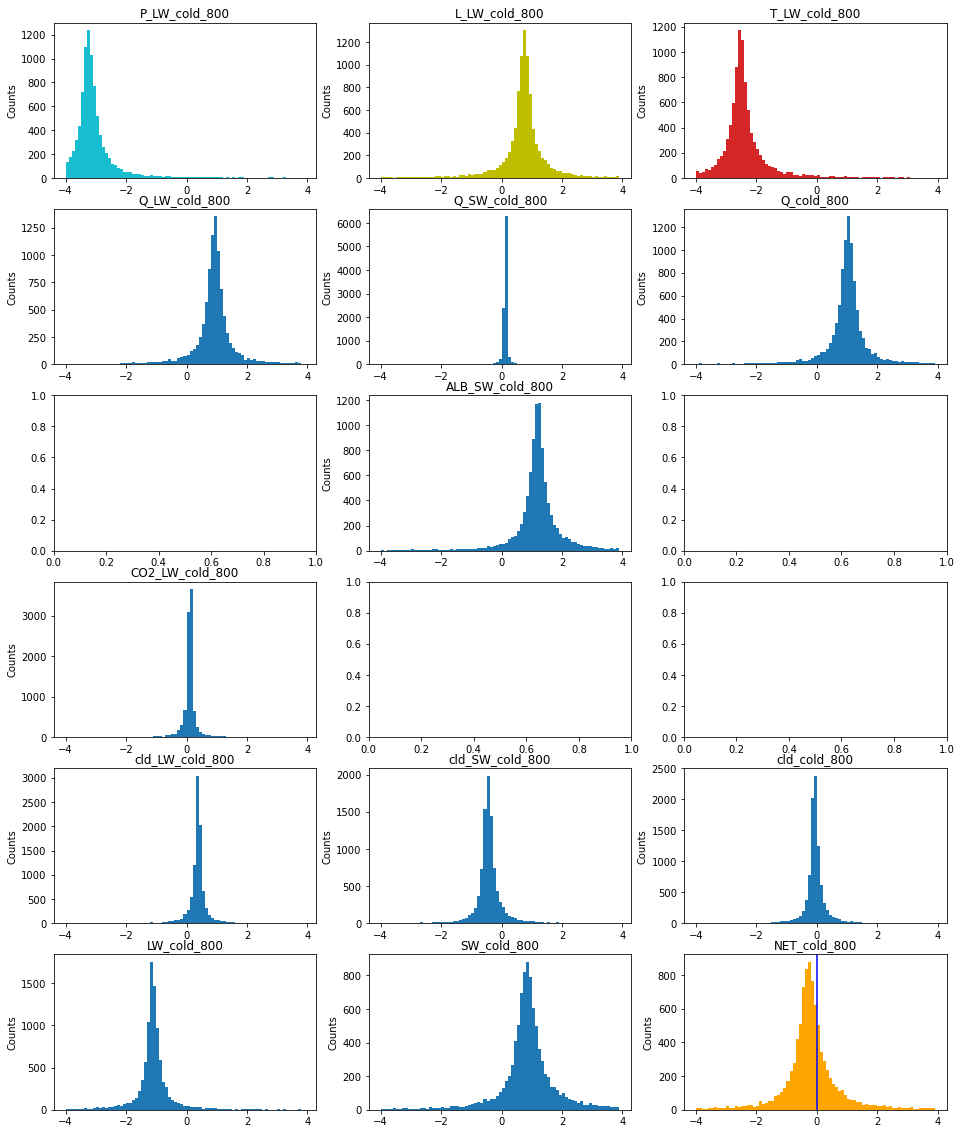

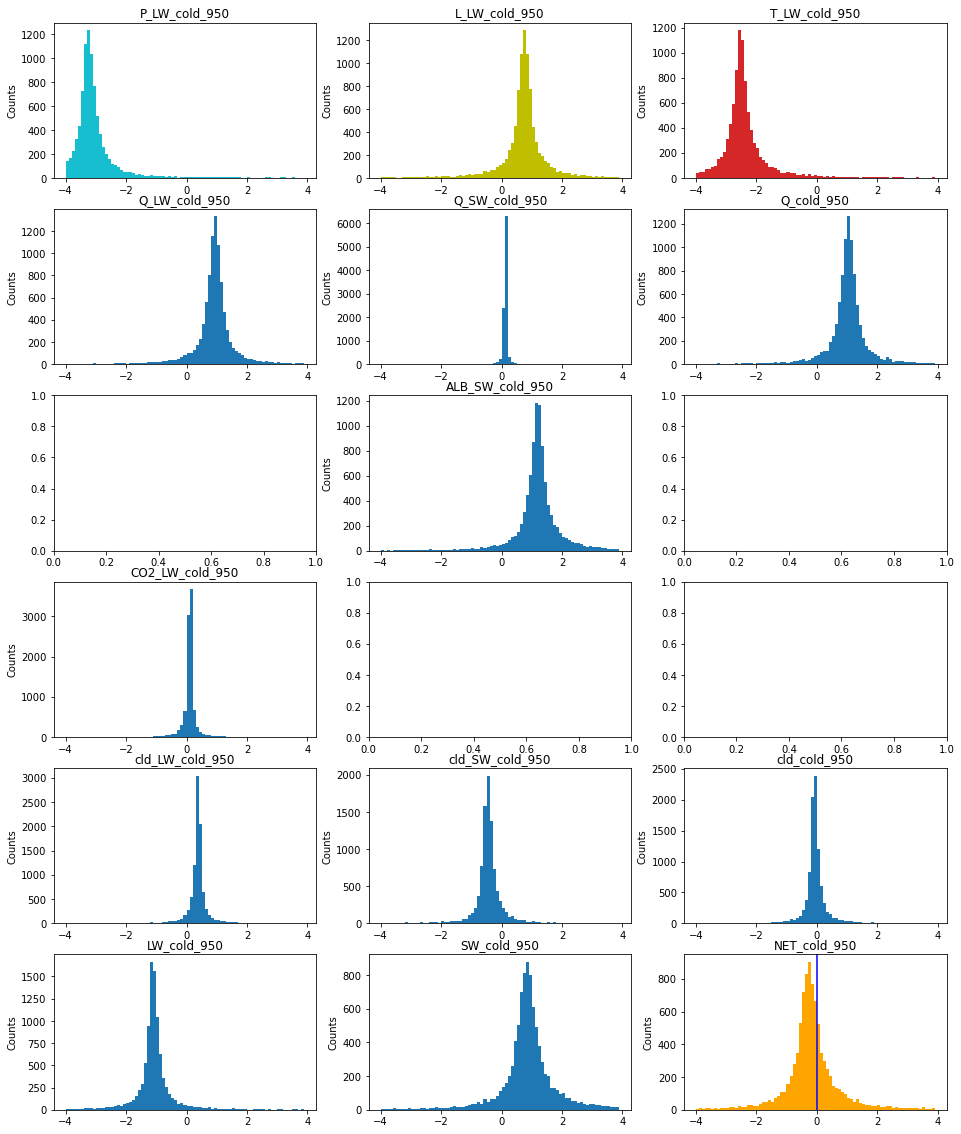

In [47]:
bins=np.arange(-4,4,0.1)
for exp in exp_cold:
    fig, axs = plt.subplots(6, 3, figsize=(16,20))
    for row in range(6):
        for col in range(3):
            if (row == 2 and col == 0) or (row == 2 and col == 2)\
            or (row == 3 and col == 1) or (row == 3 and col == 2):
                pass
            else:
                axs[row,col].hist(feedback[exp][row,col], histtype='stepfilled', bins=bins)
                axs[row,col].set_title(title[row,col]+'_'+exp)
                axs[row,col].set_ylabel('Counts')
    axs[0,0].hist(feedback[exp][0,0], histtype='stepfilled', bins=bins, color='tab:cyan')
    axs[0,1].hist(feedback[exp][0,1], histtype='stepfilled', bins=bins, color='y')
    axs[0,2].hist(feedback[exp][0,2], histtype='stepfilled', bins=bins, color='tab:red')
    axs[5,2].hist(feedback[exp][5,2], histtype='stepfilled', bins=bins, color='orange')
    axs[5,2].axvline(x=0., c='b')
    #fig.savefig('histogram_'+exp+'.pdf')

## Waterbelt

In [48]:
for exp in exp_waterbelt:
    for item in item_list:
        with open('/nfs/roselab_rit/mitgcm_output/kernel_data/feedback/'+item+'_'+exp+'.data', 'rb') as f:
            var[exp+item] = np.fromfile(f)
    var[exp+'feedback_T_SW'] = 0.
    var[exp+'feedback_T'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_T_SW']
    var[exp+'feedback_Q'] = var[exp+'feedback_Q_LW'] + var[exp+'feedback_Q_SW']
    var[exp+'feedback_L+Q'] = var[exp+'feedback_L_LW'] + var[exp+'feedback_Q_LW']
    var[exp+'feedback_ALB_LW'] = 0.
    var[exp+'feedback_ALB'] = var[exp+'feedback_ALB_LW'] + var[exp+'feedback_ALB_SW']
    var[exp+'feedback_CO2_SW'] = 0.
    var[exp+'feedback_CO2'] = var[exp+'feedback_CO2_LW'] + var[exp+'feedback_CO2_SW']
    var[exp+'feedback_cld'] = var[exp+'feedback_cld_LW'] + var[exp+'feedback_cld_SW']
    var[exp+'feedback_LW'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_Q_LW'] + \
                             var[exp+'feedback_CO2_LW'] + var[exp+'feedback_cld_LW']
    var[exp+'feedback_SW'] = var[exp+'feedback_Q_SW'] + var[exp+'feedback_ALB_SW'] + \
                             var[exp+'feedback_cld_SW']
    var[exp+'feedback_NET'] = var[exp+'feedback_LW'] + var[exp+'feedback_SW']
    
    feedback[exp] = np.zeros((6,3,len(var[exp+'feedback_NET'])))
    for row in range(6):
        for col in range(3):
            feedback[exp][row,col] = var[exp+'feedback_' + title[row,col]]

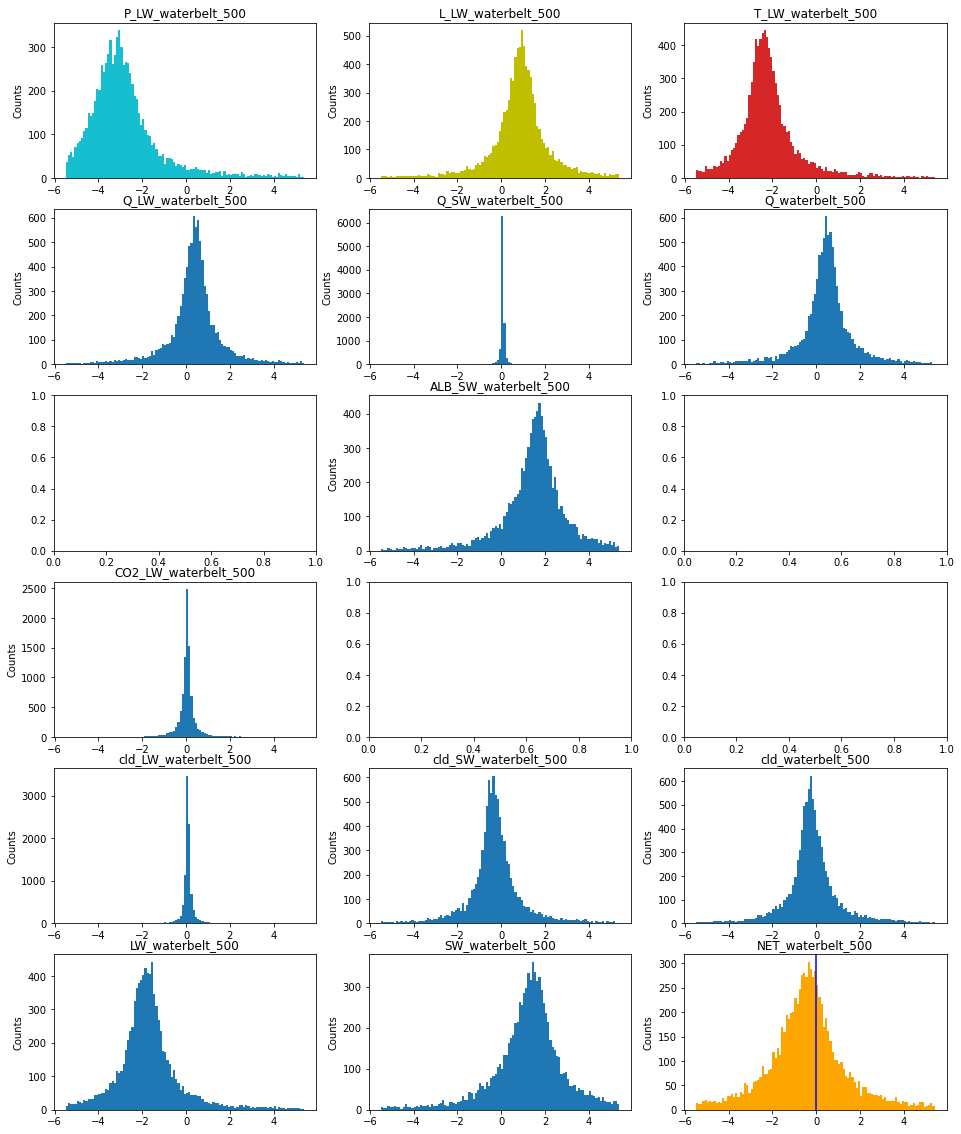

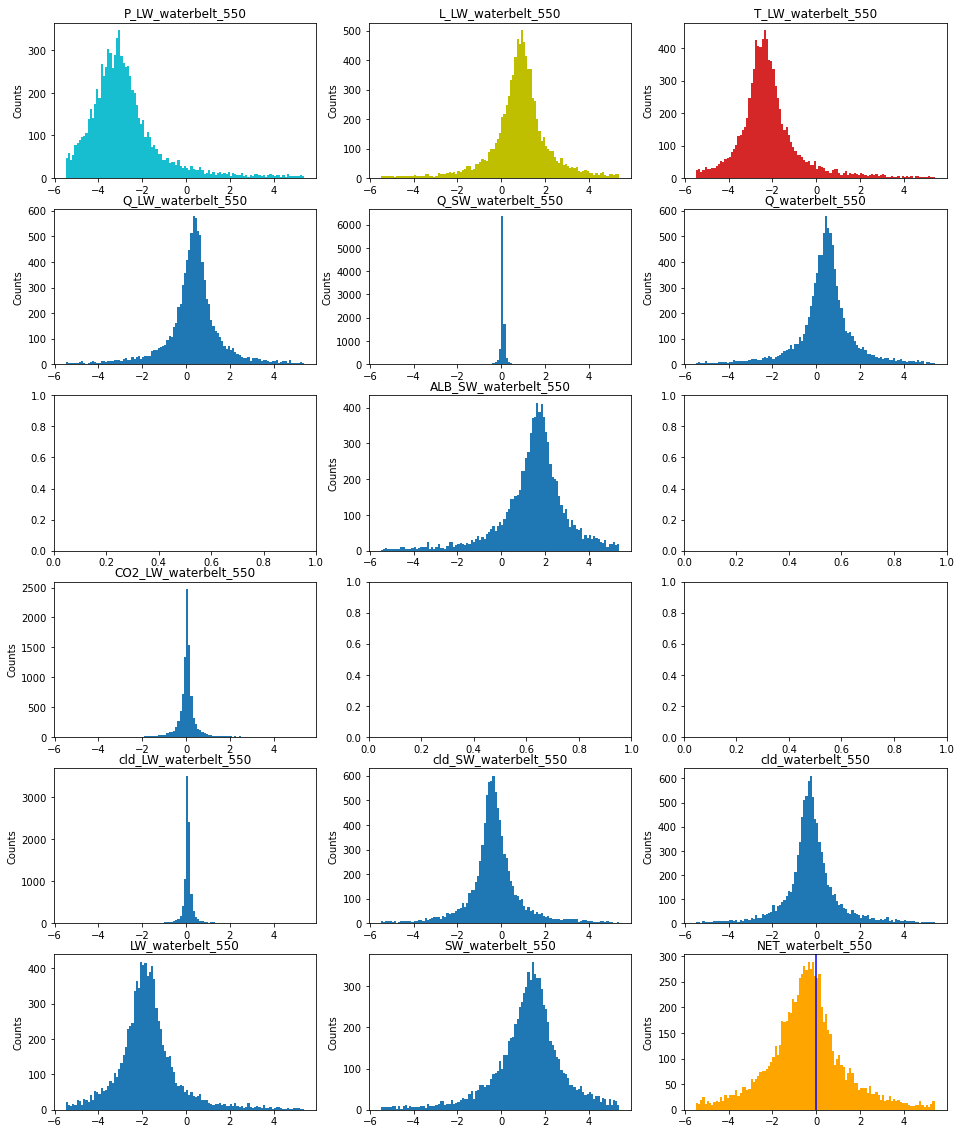

In [49]:
bins=np.arange(-5.5,5.5,0.1)
for exp in exp_waterbelt:
    fig, axs = plt.subplots(6, 3, figsize=(16,20))
    for row in range(6):
        for col in range(3):
            if (row == 2 and col == 0) or (row == 2 and col == 2)\
            or (row == 3 and col == 1) or (row == 3 and col == 2):
                pass
            else:
                axs[row,col].hist(feedback[exp][row,col], histtype='stepfilled', bins=bins)
                axs[row,col].set_title(title[row,col]+'_'+exp)
                axs[row,col].set_ylabel('Counts')
    axs[0,0].hist(feedback[exp][0,0], histtype='stepfilled', bins=bins, color='tab:cyan')
    axs[0,1].hist(feedback[exp][0,1], histtype='stepfilled', bins=bins, color='y')
    axs[0,2].hist(feedback[exp][0,2], histtype='stepfilled', bins=bins, color='tab:red')
    axs[5,2].hist(feedback[exp][5,2], histtype='stepfilled', bins=bins, color='orange')
    axs[5,2].axvline(x=0., c='b')
    #fig.savefig('histogram_'+exp+'.pdf')

## Total histogram

In [50]:
barlist = ['feedback_P_LW',
           'feedback_L+Q',
           'feedback_L_LW',
           'feedback_Q_LW',
           'feedback_CO2',
           'feedback_cld_LW',
           'feedback_cld_SW',
           'feedback_Q_SW',
           'feedback_ALB',
           'feedback_LW',
           'feedback_SW',
           'feedback_NET',
          ]
label = ['Planck',
         'LR + WV LW',
         'Lapse Rate',
         'Water Vapor LW',
         'Carbon',
         'Cloud LW',
         'Cloud SW',
         'Water Vapor SW',
         'Surface Albedo', 
         'Net LW',
         'Net SW',
         'Net',
        ]

In [51]:
bar_warm = {}
bar_cold = {}
bar_waterbelt = {}
avg_warm = {}
std_warm = {}
avg_cold = {}
std_cold = {}
avg_waterbelt = {}
std_waterbelt = {}
for item in barlist:
    bar_warm[item] = []
    bar_cold[item] = []
    bar_waterbelt[item] = []
    for exp in exp_warm:
        warm = var[exp+item]
        warm.sort()
        bar_warm[item].append(warm[980:8821])
        avg_warm[item] = np.mean(bar_warm[item]) # average on 10th-90th percentiles of 9801 samples
        std_warm[item] = np.std(bar_warm[item])
    for exp in exp_cold:
        cold = var[exp+item]
        cold.sort()
        bar_cold[item].append(cold[980:8821])  
        avg_cold[item] = np.mean(bar_cold[item]) # average on 10th-90th percentiles of 9801 samples
        std_cold[item] = np.std(bar_cold[item])
    for exp in exp_waterbelt:
        waterbelt = var[exp+item]
        waterbelt.sort()
        bar_waterbelt[item].append(waterbelt[980:8821])  
        avg_waterbelt[item] = np.mean(bar_waterbelt[item]) # average on 10th-90th percentiles of 9801 samples
        std_waterbelt[item] = np.std(bar_waterbelt[item])

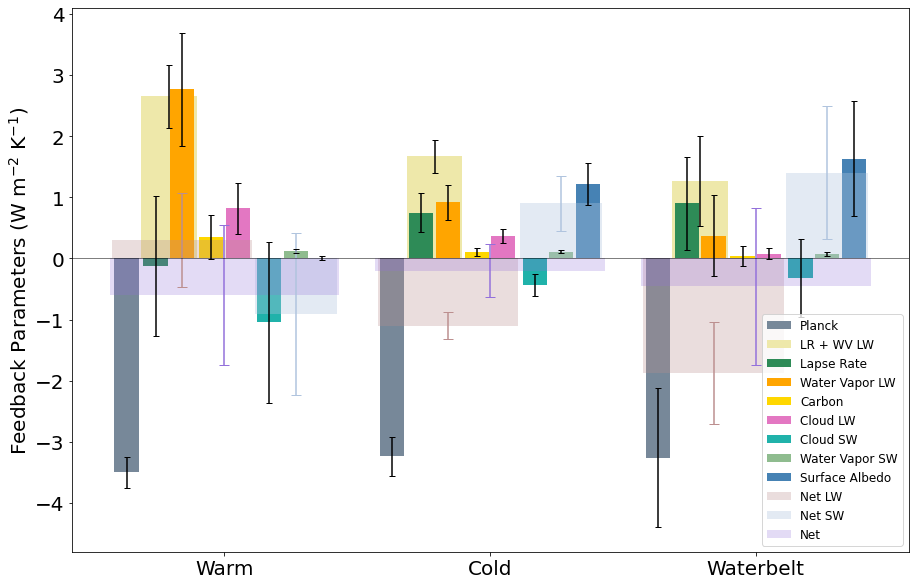

In [52]:
states = ['Warm', 'Cold', 'Waterbelt']
avg = {}
std = {}
for bar in barlist:
    avg[bar] = [avg_warm[bar], avg_cold[bar], avg_waterbelt[bar]]
    std[bar] = [std_warm[bar], std_cold[bar], std_waterbelt[bar]]
    
w = [0.1, 0.23, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.58, 0.34, 0.95]
x = [[0, 0.175, 0.12, 0.23, 0.35, 0.46, 0.59, 0.7, 0.81, 0.23, 0.7, 0.405],
     [1.1, 1.275, 1.22, 1.33, 1.45, 1.56, 1.69, 1.8, 1.91, 1.33, 1.8, 1.505],
     [2.2, 2.375, 2.32, 2.43, 2.55, 2.66, 2.79, 2.9, 3.01, 2.43, 2.9, 2.605]]
c = ['lightslategrey','palegoldenrod','seagreen','orange','gold','tab:pink','lightseagreen',
     'darkseagreen','steelblue','rosybrown','lightsteelblue','mediumpurple']

fig, ax = plt.subplots(figsize=(15,10))
for ind in range(9):
    ax.bar([x[0][ind],x[1][ind],x[2][ind]], avg[barlist[ind]], alpha=1., color=c[ind], yerr=std[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=3.)
for ind in range(9,10):
    ax.bar([x[0][ind],x[1][ind],x[2][ind]], avg[barlist[ind]], alpha=0.3, color=c[ind], yerr=std[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=5., ecolor=c[ind])#, edgecolor='black')
for ind in range(10,11):
    ax.bar([x[0][ind],x[1][ind],x[2][ind]], avg[barlist[ind]], alpha=0.35, color=c[ind], yerr=std[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=5., ecolor=c[ind])#, edgecolor='black')
for ind in range(11,12):
    ax.bar([x[0][ind],x[1][ind],x[2][ind]], avg[barlist[ind]], alpha=0.25, color=c[ind], yerr=std[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=5., ecolor=c[ind])#, edgecolor='black')
    
ax.set_ylabel('Feedback Parameters (W m$^{-2}$ K$^{-1}$)', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.set_xticks([x[0][-1],x[1][-1],x[2][-1]])
ax.set_xticklabels(states, fontsize=20)
ax.axhline(y=0., color='black', linewidth=0.5)
ax.legend(loc='lower right', fontsize=12);
# fig.savefig('barplot_total.pdf')

## Barely unstable state histogram

In [53]:
# Calculate cloud feedbacks as residuals

exp_warm = ['warmT293_50']
item_list = ['feedback_T_LW',
             'feedback_P_LW',
             'feedback_L_LW',
             'feedback_Q_LW',
             'feedback_Q_SW',
             'feedback_ALB_SW',
             'feedback_CO2_LW',
#              'feedback_cld_LW',
#              'feedback_cld_SW',
             ]

slope_SW = 0.59
slope_LW = -0.53
for exp in exp_warm:
    for item in item_list:
        with open('/nfs/roselab_rit/mitgcm_output/kernel_data/feedback/'+item+'_'+exp+'.data', 'rb') as f:
            var[exp+item] = np.fromfile(f)
    var[exp+'feedback_T_SW'] = 0.
    var[exp+'feedback_T'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_T_SW']
    var[exp+'feedback_Q'] = var[exp+'feedback_Q_LW'] + var[exp+'feedback_Q_SW']
    var[exp+'feedback_L+Q'] = var[exp+'feedback_L_LW'] + var[exp+'feedback_Q_LW']
    var[exp+'feedback_ALB_LW'] = 0.
    var[exp+'feedback_ALB'] = var[exp+'feedback_ALB_LW'] + var[exp+'feedback_ALB_SW']
    var[exp+'feedback_CO2_SW'] = 0.
    var[exp+'feedback_CO2'] = var[exp+'feedback_CO2_LW'] + var[exp+'feedback_CO2_SW']
    var[exp+'feedback_cld_LW'] = slope_LW - var[exp+'feedback_T_LW'] \
                                          - var[exp+'feedback_Q_LW'] \
                                          - var[exp+'feedback_CO2_LW']
    var[exp+'feedback_cld_SW'] = slope_SW - var[exp+'feedback_Q_SW'] - var[exp+'feedback_ALB_SW']
    var[exp+'feedback_cld'] = var[exp+'feedback_cld_LW'] + var[exp+'feedback_cld_SW']
    var[exp+'feedback_LW'] = var[exp+'feedback_T_LW'] + var[exp+'feedback_Q_LW'] + \
                             var[exp+'feedback_CO2_LW'] + var[exp+'feedback_cld_LW']
    var[exp+'feedback_SW'] = var[exp+'feedback_Q_SW'] + var[exp+'feedback_ALB_SW'] + \
                             var[exp+'feedback_cld_SW']
    var[exp+'feedback_NET'] = var[exp+'feedback_LW'] + var[exp+'feedback_SW']
    
    feedback[exp] = np.zeros((6,3,len(var[exp+'feedback_NET'])))
    for row in range(6):
        for col in range(3):
            feedback[exp][row,col] = var[exp+'feedback_' + title[row,col]]

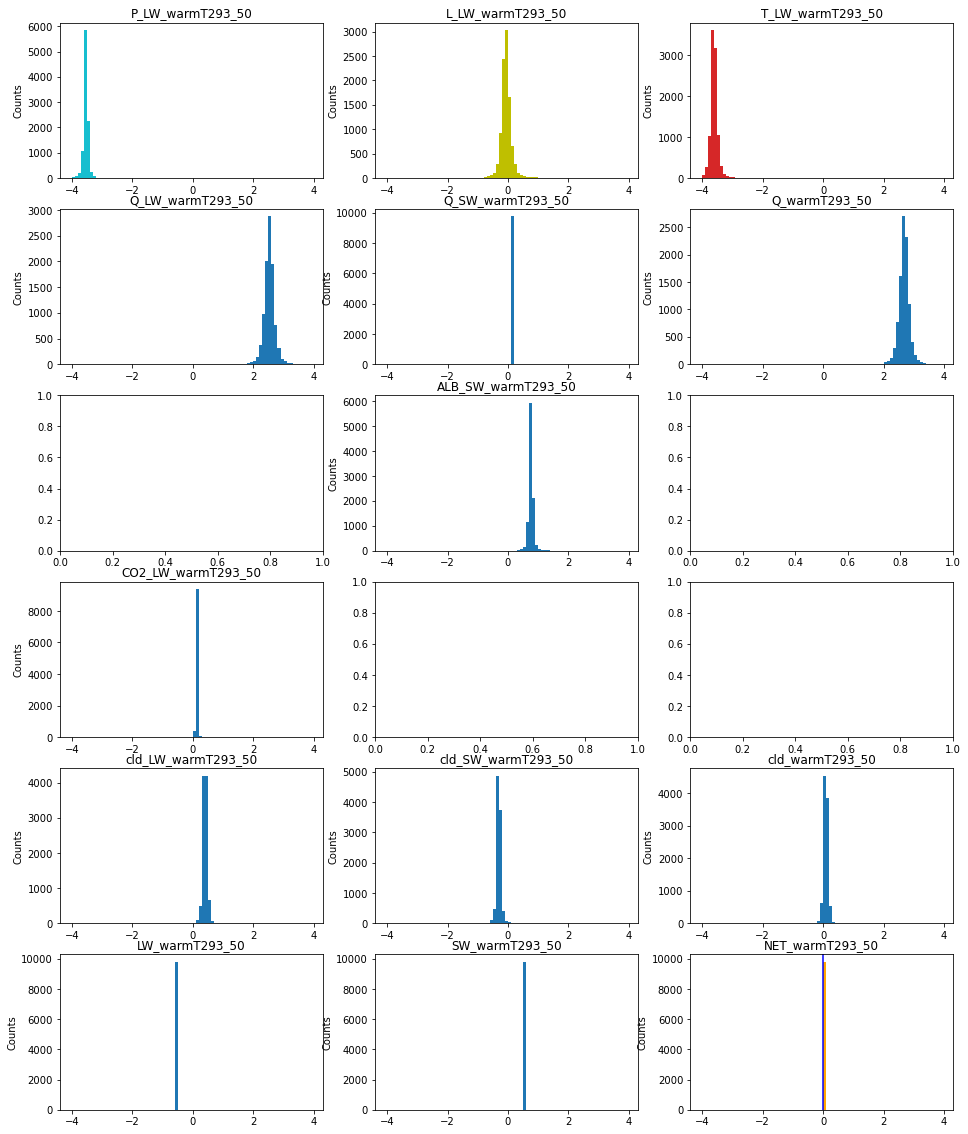

In [54]:
bins=np.arange(-4,4,0.1)
for exp in exp_warm:
    fig, axs = plt.subplots(6, 3, figsize=(16,20))
    for row in range(6):
        for col in range(3):
            if (row == 2 and col == 0) or (row == 2 and col == 2)\
            or (row == 3 and col == 1) or (row == 3 and col == 2):
                pass
            else:
                axs[row,col].hist(feedback[exp][row,col], histtype='stepfilled', bins=bins)
                axs[row,col].set_title(title[row,col]+'_'+exp)
                axs[row,col].set_ylabel('Counts')
    axs[0,0].hist(feedback[exp][0,0], histtype='stepfilled', bins=bins, color='tab:cyan')
    axs[0,1].hist(feedback[exp][0,1], histtype='stepfilled', bins=bins, color='y')
    axs[0,2].hist(feedback[exp][0,2], histtype='stepfilled', bins=bins, color='tab:red')
    axs[5,2].hist(feedback[exp][5,2], histtype='stepfilled', bins=bins, color='orange')
    axs[5,2].axvline(x=0., c='b')
    #fig.savefig('histogram_'+exp+'.pdf')

In [55]:
bar_warm = {}
avg_warm = {}
std_warm = {}
for item in barlist:
    bar_warm[item] = []
    for exp in exp_warm:
        warm = var[exp+item]
        warm.sort()
        bar_warm[item].append(warm[980:8821]) 
        avg_warm[item] = np.mean(bar_warm[item])
        std_warm[item] = np.std(bar_warm[item])

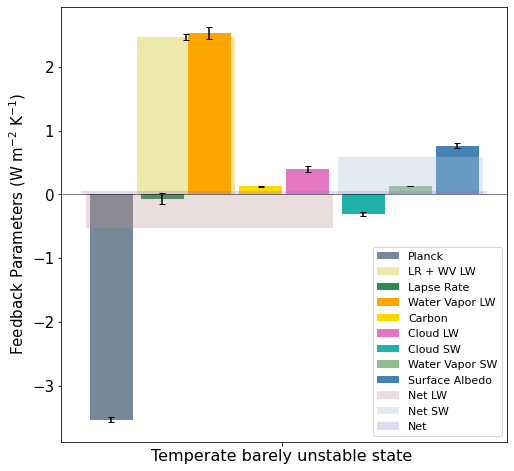

In [63]:
states = ['Temperate barely unstable state']
    
w = [0.1, 0.23, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.58, 0.34, 0.95]
x = [1, 1.175, 1.12, 1.23, 1.35, 1.46, 1.59, 1.7, 1.81, 1.23, 1.7, 1.405]
c = ['lightslategrey','palegoldenrod','seagreen','orange','gold','tab:pink','lightseagreen',
     'darkseagreen','steelblue','rosybrown','lightsteelblue','mediumpurple']

fig, ax = plt.subplots(figsize=(8,8))
for ind in range(9):
    ax.bar(x[ind], avg_warm[barlist[ind]], alpha=1., color=c[ind], yerr=std_warm[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=3.)
for ind in range(9,10):
    ax.bar(x[ind], avg_warm[barlist[ind]], alpha=0.3, color=c[ind], #yerr=std_warm[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=5., ecolor=c[ind])#, edgecolor='black')
for ind in range(10,11):
    ax.bar(x[ind], avg_warm[barlist[ind]], alpha=0.35, color=c[ind], #yerr=std_warm[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=5., ecolor=c[ind])#, edgecolor='black')
for ind in range(11,12):
    ax.bar(x[ind], avg_warm[barlist[ind]], alpha=0.25, color=c[ind], #yerr=std_warm[barlist[ind]], 
           width=w[ind], label=label[ind], capsize=5., ecolor=c[ind])#, edgecolor='black')

ax.set_ylabel('Feedback Parameters (W m$^{-2}$ K$^{-1}$)', fontsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_xticks([1.4])
ax.set_xticklabels(states, fontsize=16)
ax.axhline(y=0., color='black', linewidth=0.5)
ax.legend(loc='lower right', fontsize=11);
# fig.savefig('barplot_unstable.pdf')

## Carbon feedback histogram

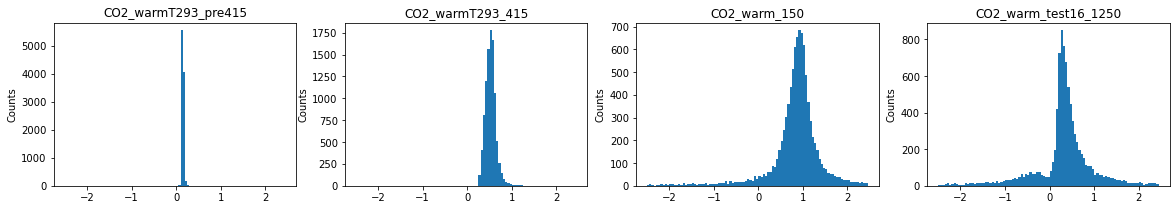

In [57]:
exp_warm = [
            'warmT293_pre415',
            'warmT293_415',
            'warm_150',
            'warm_test16_1250',
            ]
bins=np.arange(-2.5,2.5,0.05)
i=0
fig, axs = plt.subplots(1, len(exp_warm), figsize=(5*len(exp_warm),3))
for exp in exp_warm:
    with open('/nfs/roselab_rit/mitgcm_output/kernel_data/feedback/feedback_CO2_LW_'+exp+'.data', 'rb') as f:
        var[exp+'feedback_CO2_LW'] = np.fromfile(f)
        
    if len(exp_warm) > 1:
        axs[i].hist(var[exp+'feedback_CO2_LW'], histtype='stepfilled', bins=bins)
        axs[i].set_title('CO2_'+exp)
        axs[i].set_ylabel('Counts')
        i+=1
    else:
        axs.hist(var[exp+'feedback_CO2_LW'], histtype='stepfilled', bins=bins)
        axs.set_title('CO2_'+exp)
        axs.set_ylabel('Counts')

0.1488767784338921
0.5201624250454076
0.896858285316777
0.3524399362704951


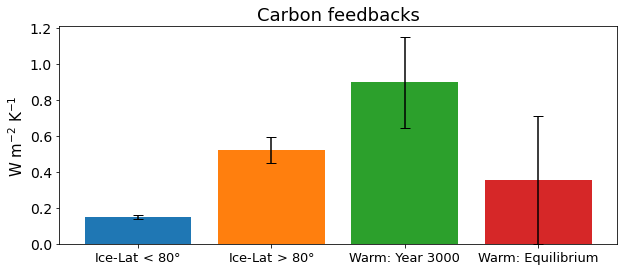

In [58]:
title = ['Ice-Lat < 80$\degree$',
         'Ice-Lat > 80$\degree$',
         'Warm: Year 3000',
         'Warm: Equilibrium',
         ]
bar_CO2 = {}
for exp in exp_warm:
    bar_CO2[exp] = []
    CO2 = var[exp+'feedback_CO2_LW']
    CO2.sort()
    bar_CO2[exp].append(CO2[980:8821])

avg_CO2 = {}
std_CO2 = {}
for exp in exp_warm:
    avg_CO2[exp] = np.mean(bar_CO2[exp])
    std_CO2[exp] = np.std(bar_CO2[exp])
    
fig, ax = plt.subplots(figsize=(10,4))
for ind in range(len(exp_warm)):
    ax.bar(title[ind], avg_CO2[exp_warm[ind]], yerr=std_CO2[exp_warm[ind]], capsize=5.)
    print(avg_CO2[exp_warm[ind]])
ax.set_ylabel('W m$^{-2}$ K$^{-1}$', fontsize=15)
ax.set_title('Carbon feedbacks', fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(bottom=0)

os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('carbon_histogram.pdf')